# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
df = pd.read_csv("/gdrive/MyDrive/BritishAirway/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
#df.describe()

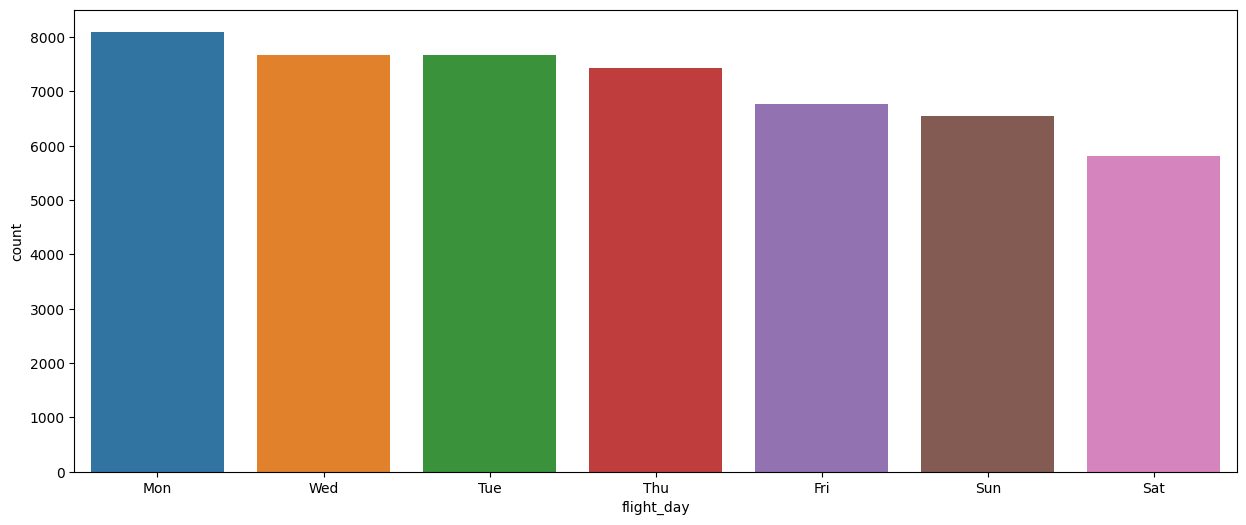

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day", data=df, order=df["flight_day"].value_counts().index)
plt.show()

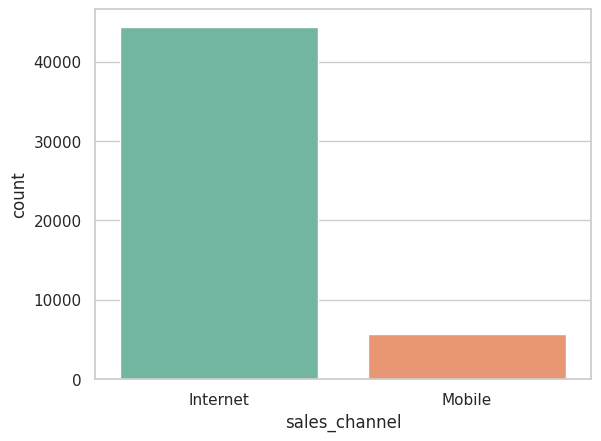

In [ ]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='sales_channel', data=df, palette='Set2')
plt.show()

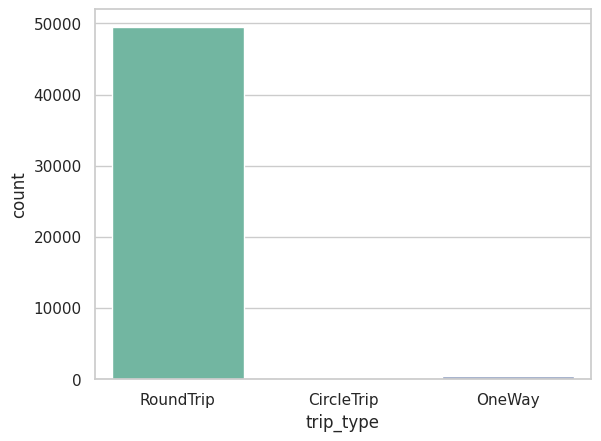

In [ ]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='trip_type', data=df, palette='Set2')
plt.show()

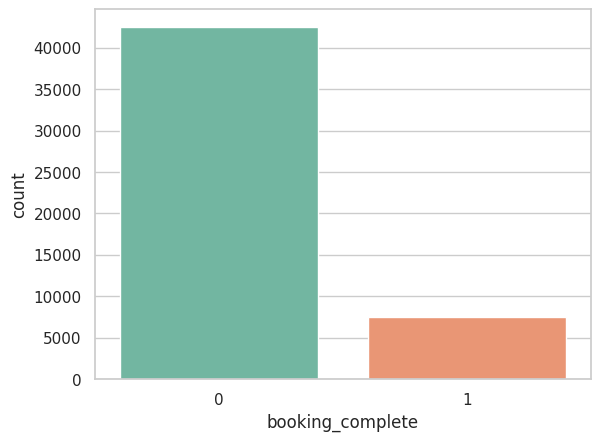

In [ ]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='booking_complete', data=df, palette='Set2')
plt.show()

Feature encoding

In [ ]:
from sklearn import preprocessing

label_encode = ['sales_channel']
label_encoder=['route']
one_hot = ['booking_origin']

mapping_trip_type = {
    'RoundTrip'  : 0,
    'OneWay'     : 1,
    'CircleTrip' : 2,
}

df['trip_type'] = df['trip_type'].map(mapping_trip_type)
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

df['sales_channel'] = preprocessing.LabelEncoder().fit_transform(df['sales_channel'])
df['route'] = preprocessing.LabelEncoder().fit_transform(df['route'])

onehots = pd.get_dummies(df['booking_origin'], prefix='booking_origin')
df = df.join(onehots)

df.drop('booking_origin', axis=1, inplace=True)

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,0,0,262,19,7,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,112,20,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,243,22,17,3,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,96,31,4,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,68,22,15,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0


splite data into test and trian set

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['booking_complete'], axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

# Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y1 = oversample.fit_resample(x_train, y_train)

# Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
#RandomForestClassifier without over sampling
Rf_model = RandomForestClassifier(random_state=42)
Rf_model.fit(x_train, y_train)
Rf_model.score(x_test, y_test)
y_pred_log = Rf_model.predict(x_test)
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.53      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000



In [ ]:
#RandomForestClassifier with over sampling
Rf_model_S = RandomForestClassifier(random_state=42)
Rf_model_S.fit(X, y1)
Rf_model_S.score(x_test, y_test)
y_pred_log1 = Rf_model_S.predict(x_test)
print(classification_report(y_test,y_pred_log1))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      8520
           1       0.36      0.35      0.36      1480

    accuracy                           0.81     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.81      0.81      0.81     10000



PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(x)
X_pca.shape

(50000, 8)

In [ ]:
pca.explained_variance_ratio_
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
Rf_model_P = RandomClassifier(random_state=42)
Rf_model_P.fit(X_train_pca, y_train_pca)
Rf_model_P.score(X_test_pca, y_test_pca)
y_pred_log2 = Rf_model_P.predict(X_test_pca)
print(classification_report(y_test_pca,y_pred_log2))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.59      0.07      0.12      1480

    accuracy                           0.85     10000
   macro avg       0.72      0.53      0.52     10000
weighted avg       0.82      0.85      0.80     10000



In [ ]:
import numpy as np

importances = Rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

feat_labels = df.columns[1:]

# for f in range(x_train.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30,
#                             feat_labels[sorted_indices[f]],
#                             importances[sorted_indices[f]]))

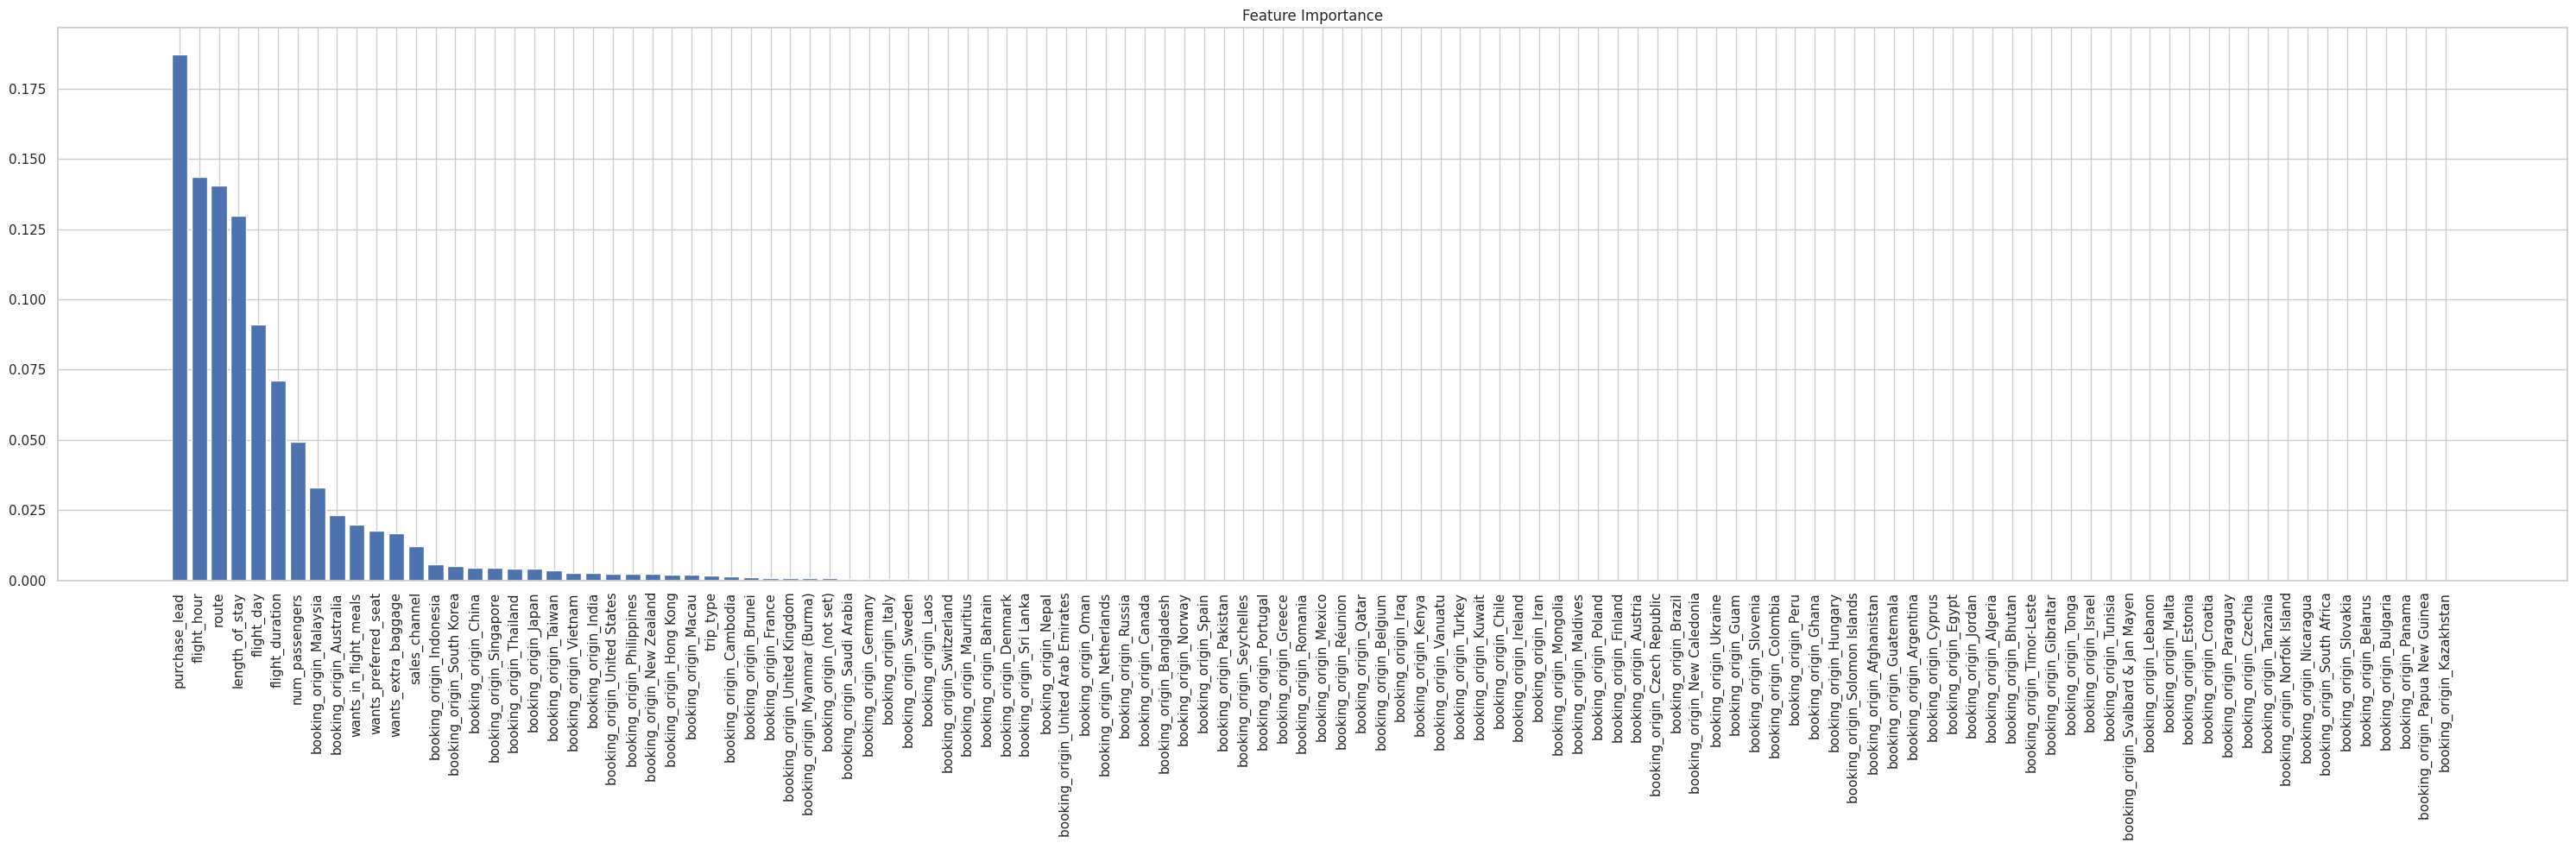

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()